<a href="https://colab.research.google.com/github/arindamdeyofficial/houseprediction/blob/main/houseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/arindamdeyofficial/houseprediction/main/housing.csv')


In [4]:
df.shape
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.groupby('ocean_proximity').count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9034,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6496,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2270,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2628,2658,2658,2658,2658


In [7]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [9]:
df[df.columns[df.isna().any()]]

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [10]:
tbOut = df[df.isnull().any(axis=1)]

In [11]:
tbOut

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
len(tbOut.index)/len(df.index)*100

1.002906976744186

So total_bedrooms 207 rows are null values and less than 5%. Then we can't. reject these records. Then we have to impute.

In [13]:
df.groupby('total_bedrooms').head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


1923 distinct values of total_bedrooms. So this is continuous value. The impute with mean / median.

In [14]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True)

In [15]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Now need to do normalisation.

In [46]:
dNearbay = df.loc[df['ocean_proximity'] == 'NEAR BAY']

In [17]:
dNearbay

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19067,-122.45,38.28,20.0,3306.0,503.0,1374.0,460.0,5.7984,297600.0,NEAR BAY
19068,-122.47,38.29,14.0,3732.0,846.0,1277.0,775.0,2.5658,208000.0,NEAR BAY
19069,-122.45,38.27,25.0,5024.0,881.0,1994.0,838.0,4.2237,262300.0,NEAR BAY
19077,-122.49,38.27,8.0,5092.0,988.0,1657.0,936.0,3.5625,213200.0,NEAR BAY


In [18]:
dNearbay.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,-122.260694,37.801057,37.730131,2493.589520,514.389699,1230.317467,488.616157,4.172885,259212.311790
std,0.147004,0.185434,13.070385,1830.817022,366.283515,885.899035,350.598369,2.017427,122818.537064
min,-122.590000,37.350000,2.000000,8.000000,1.000000,8.000000,1.000000,0.499900,22500.000000
25%,-122.410000,37.730000,29.000000,1431.250000,290.000000,718.250000,275.000000,2.834750,162500.000000
50%,-122.250000,37.790000,39.000000,2083.000000,425.500000,1033.500000,406.000000,3.818650,233800.000000
75%,-122.140000,37.907500,52.000000,3029.750000,626.000000,1495.000000,599.250000,5.054425,345700.000000
max,-122.010000,38.340000,52.000000,18634.000000,3226.000000,8276.000000,3589.000000,15.000100,500001.000000


Boxplot to understand data distribution

{'boxes': [<matplotlib.lines.Line2D at 0x7f6ee8bde610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ee8be96d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ee8bf1710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ee8bf11d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ee8bdec10>,
  <matplotlib.lines.Line2D at 0x7f6ee8be9190>]}

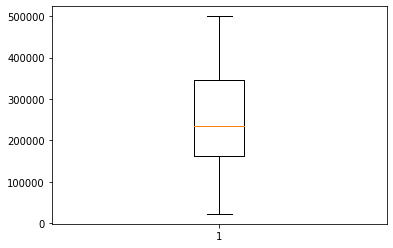

In [19]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(10, 7))
#ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(dNearbay['median_house_value'])

In [20]:
dNearbay.loc[dNearbay['median_house_value'] >= 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18358,-122.10,37.36,35.0,2063.0,266.0,676.0,252.0,8.5294,500001.0,NEAR BAY
18359,-122.09,37.35,37.0,1795.0,285.0,791.0,261.0,7.5794,500001.0,NEAR BAY
18360,-122.09,37.35,30.0,1502.0,186.0,501.0,180.0,10.0259,500001.0,NEAR BAY
18361,-122.14,37.36,23.0,11294.0,1377.0,3840.0,1367.0,12.1387,500001.0,NEAR BAY


So there are no outliers for median_house_value as max value has 194 records

{'boxes': [<matplotlib.lines.Line2D at 0x7f6ee8497ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6ee849ef90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ee84a4fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ee84a4a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6ee849e510>,
  <matplotlib.lines.Line2D at 0x7f6ee849ea50>]}

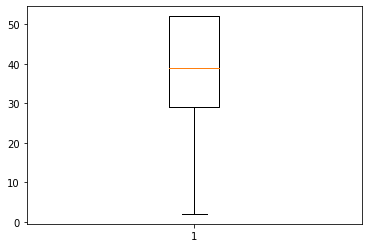

In [21]:
plt.boxplot(dNearbay['housing_median_age'])

In [22]:
dNearbay['housing_median_age'].describe()

count    2290.000000
mean       37.730131
std        13.070385
min         2.000000
25%        29.000000
50%        39.000000
75%        52.000000
max        52.000000
Name: housing_median_age, dtype: float64

In [23]:
dNearbay.loc[dNearbay['housing_median_age'] < 10].count()

longitude             56
latitude              56
housing_median_age    56
total_rooms           56
total_bedrooms        56
population            56
households            56
median_income         56
median_house_value    56
ocean_proximity       56
dtype: int64

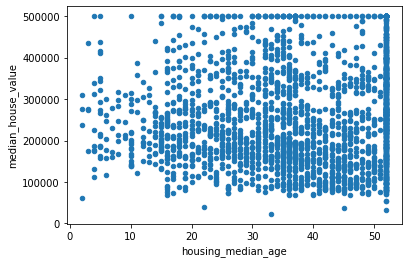

In [24]:
dNearbay.plot.scatter('housing_median_age', 'median_house_value')

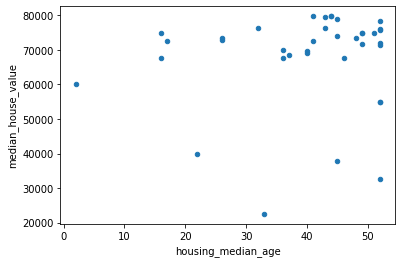

In [25]:
dNearbay.loc[dNearbay['median_house_value'] < 80000].plot.scatter('housing_median_age', 'median_house_value')

In [40]:
dNearbay.loc[dNearbay['median_house_value'] < 80000].count()/dNearbay['median_house_value'].count()*100

longitude             1.615721
latitude              1.615721
housing_median_age    1.615721
total_rooms           1.615721
total_bedrooms        1.615721
population            1.615721
households            1.615721
median_income         1.615721
median_house_value    1.615721
ocean_proximity       1.615721
dtype: float64

Now we have identified these less than 80000 as outliers need to remove

In [47]:
dNearbay.loc[dNearbay['median_house_value'] < 80000].index

Int64Index([   59,    60,    61,    63,    64,    65,    72,    73,   192,
              198,   199,   314,   315,   316,   324,   328,   329,  1423,
             1612,  1724,  1726,  1727,  1728,  1781,  1783,  1784,  1785,
             1788,  1790,  1791,  1825,  9290, 15651, 15738, 15777, 15784,
            18211],
           dtype='int64')

In [48]:
dNearbay.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
dNearbay.loc[dNearbay['median_house_value'] < 80000]['longitude'].unique()

array([-122.29, -122.3 , -122.25, -122.23, -122.19, -122.2 , -122.18,
       -122.05, -122.08, -122.36, -122.37, -122.41, -122.32, -122.53,
       -122.42, -122.06])

{'boxes': [<matplotlib.lines.Line2D at 0x7fbaeb11b790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbaeb1207d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaeb127810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaeb1272d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbaeb169310>,
  <matplotlib.lines.Line2D at 0x7fbaeb120290>]}

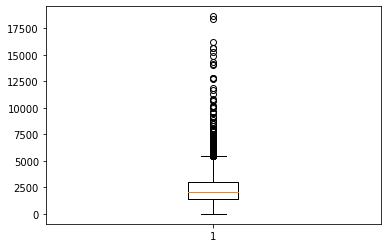

In [ ]:
plt.boxplot(dNearbay['total_rooms'])

In [ ]:
dNearbay.loc[dNearbay['total_rooms'] > 7500].count()/dNearbay.count()*100

longitude             1.921397
latitude              1.921397
housing_median_age    1.921397
total_rooms           1.921397
total_bedrooms        1.921397
population            1.921397
households            1.921397
median_income         1.921397
median_house_value    1.921397
ocean_proximity       1.921397
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fbaeb08f110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbaeb096150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbaeb09d190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbaeb096c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbaeb0d4c10>,
  <matplotlib.lines.Line2D at 0x7fbaeb08fbd0>]}

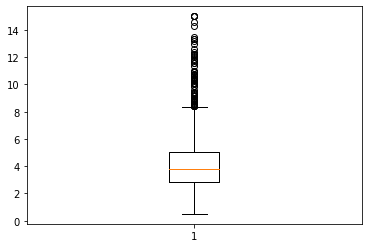

In [ ]:
plt.boxplot(dNearbay['median_income'])